In [1]:
import sys
import string
import itertools
from collections import Counter, defaultdict
import re

from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext line_profiler

In [3]:
data = Path('../data/day_05.txt').read_text()

In [4]:
lines = [[*map(int, re.findall(r'[0-9]+', k))] for k in data.splitlines()]

%timeit lines = [[*map(int, re.findall(r'[0-9]+', k))] for k in data.splitlines()]

759 µs ± 8.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
def part_a():
    grid = dict()

    for x1, y1, x2, y2 in lines:
        if x1 == x2:
            y1, y2 = sorted([y1, y2])
            for y in range(y1, y2 + 1):
                grid[(x1, y)] = grid.get((x1, y), 0) + 1

        elif y1 == y2:
            x1, x2 = sorted([x1, x2])
            for x in range(x1, x2 + 1):
                grid[(x, y1)] = grid.get((x, y1), 0) + 1

    return len([k for k in grid.values() if k > 1])
print(part_a())
%timeit part_a()

7318
24.5 ms ± 454 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
def part_b():
    grid = dict()

    for x1, y1, x2, y2 in lines:
        if x1 == x2:
            y1, y2 = sorted([y1, y2])
            for y in range(y1, y2 + 1):
                grid[(x1, y)] = grid.get((x1, y), 0) + 1

        elif y1 == y2:
            x1, x2 = sorted([x1, x2])
            for x in range(x1, x2 + 1):
                grid[(x, y1)] = grid.get((x, y1), 0) + 1

        else:
            xstep = 1 if x2 > x1 else -1
            ystep = 1 if y2 > y1 else -1
            for x, y in zip(range(x1, x2 + xstep, xstep), range(y1, y2 + ystep, ystep)):
                grid[(x, y)] = grid.get((x, y), 0) + 1

    return len([k for k in grid.values() if k > 1]), grid

out, grid = part_b()
print(out)
%timeit part_b()

19939
43.9 ms ± 2.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%lprun -f part_b part_b()

Timer unit: 1e-06 s

Total time: 0.212346 s
File: <ipython-input-6-fc41416e3228>
Function: part_b at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def part_b():
     2         1         16.0     16.0      0.0      grid = dict()
     3                                           
     4       501        303.0      0.6      0.1      for x1, y1, x2, y2 in lines:
     5       500        225.0      0.5      0.1          if x1 == x2:
     6       165        266.0      1.6      0.1              y1, y2 = sorted([y1, y2])
     7     50099      20587.0      0.4      9.7              for y in range(y1, y2 + 1):
     8     49934      34542.0      0.7     16.3                  grid[(x1, y)] = grid.get((x1, y), 0) + 1
     9                                           
    10       335        123.0      0.4      0.1          elif y1 == y2:
    11       172        254.0      1.5      0.1              x1, x2 = sorted([x1, x2])
    1

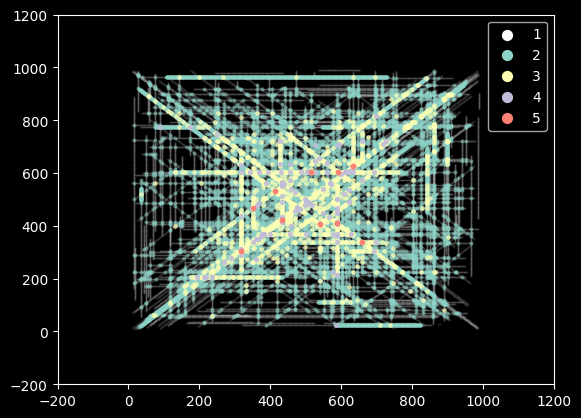

In [12]:
import matplotlib
matplotlib.style.use('dark_background')

d = defaultdict(lambda : {'x': [], 'y': []})
for (x,y),c in grid.items():
    d[c]['x'].append(x)
    d[c]['y'].append(y)

for k,v in sorted(d.items()):
    if k == 1:
        plt.scatter(v['x'], v['y'], s=0.1, alpha=0.1, label=k, color='white')
        continue
    plt.scatter(v['x'], v['y'], s=k*2, alpha=k/5, label=k)

plt.xlim(-200, 1200)
plt.ylim(-200, 1200)
leg = plt.legend()
plt.grid(False)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([50])
plt.show()